In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("student_dropout.csv")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.shape

(4424, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
df.isnull().sum()
#no missing values

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df.duplicated().sum()
#no duplicate values

0

In [9]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [10]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [11]:
#mapping={'Graduate':1,'Enrolled':0,'Dropout':2}
#df['Target']=df['Target'].map(mapping)
#print(df['Target'].unique())
from sklearn.preprocessing import LabelEncoder
df_numeric = df.copy()
le = LabelEncoder()
df_numeric['Target'] = le.fit_transform(df_numeric['Target'].astype(str))

In [12]:
df.select_dtypes("number").columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [13]:
#sns.regplot(data=df,x='GDP',y='Target',logistic=True,ci=None)     
for i in ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']:
    continue
    sns.boxplot(x='Target', y=i, data=df_numeric)
    plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


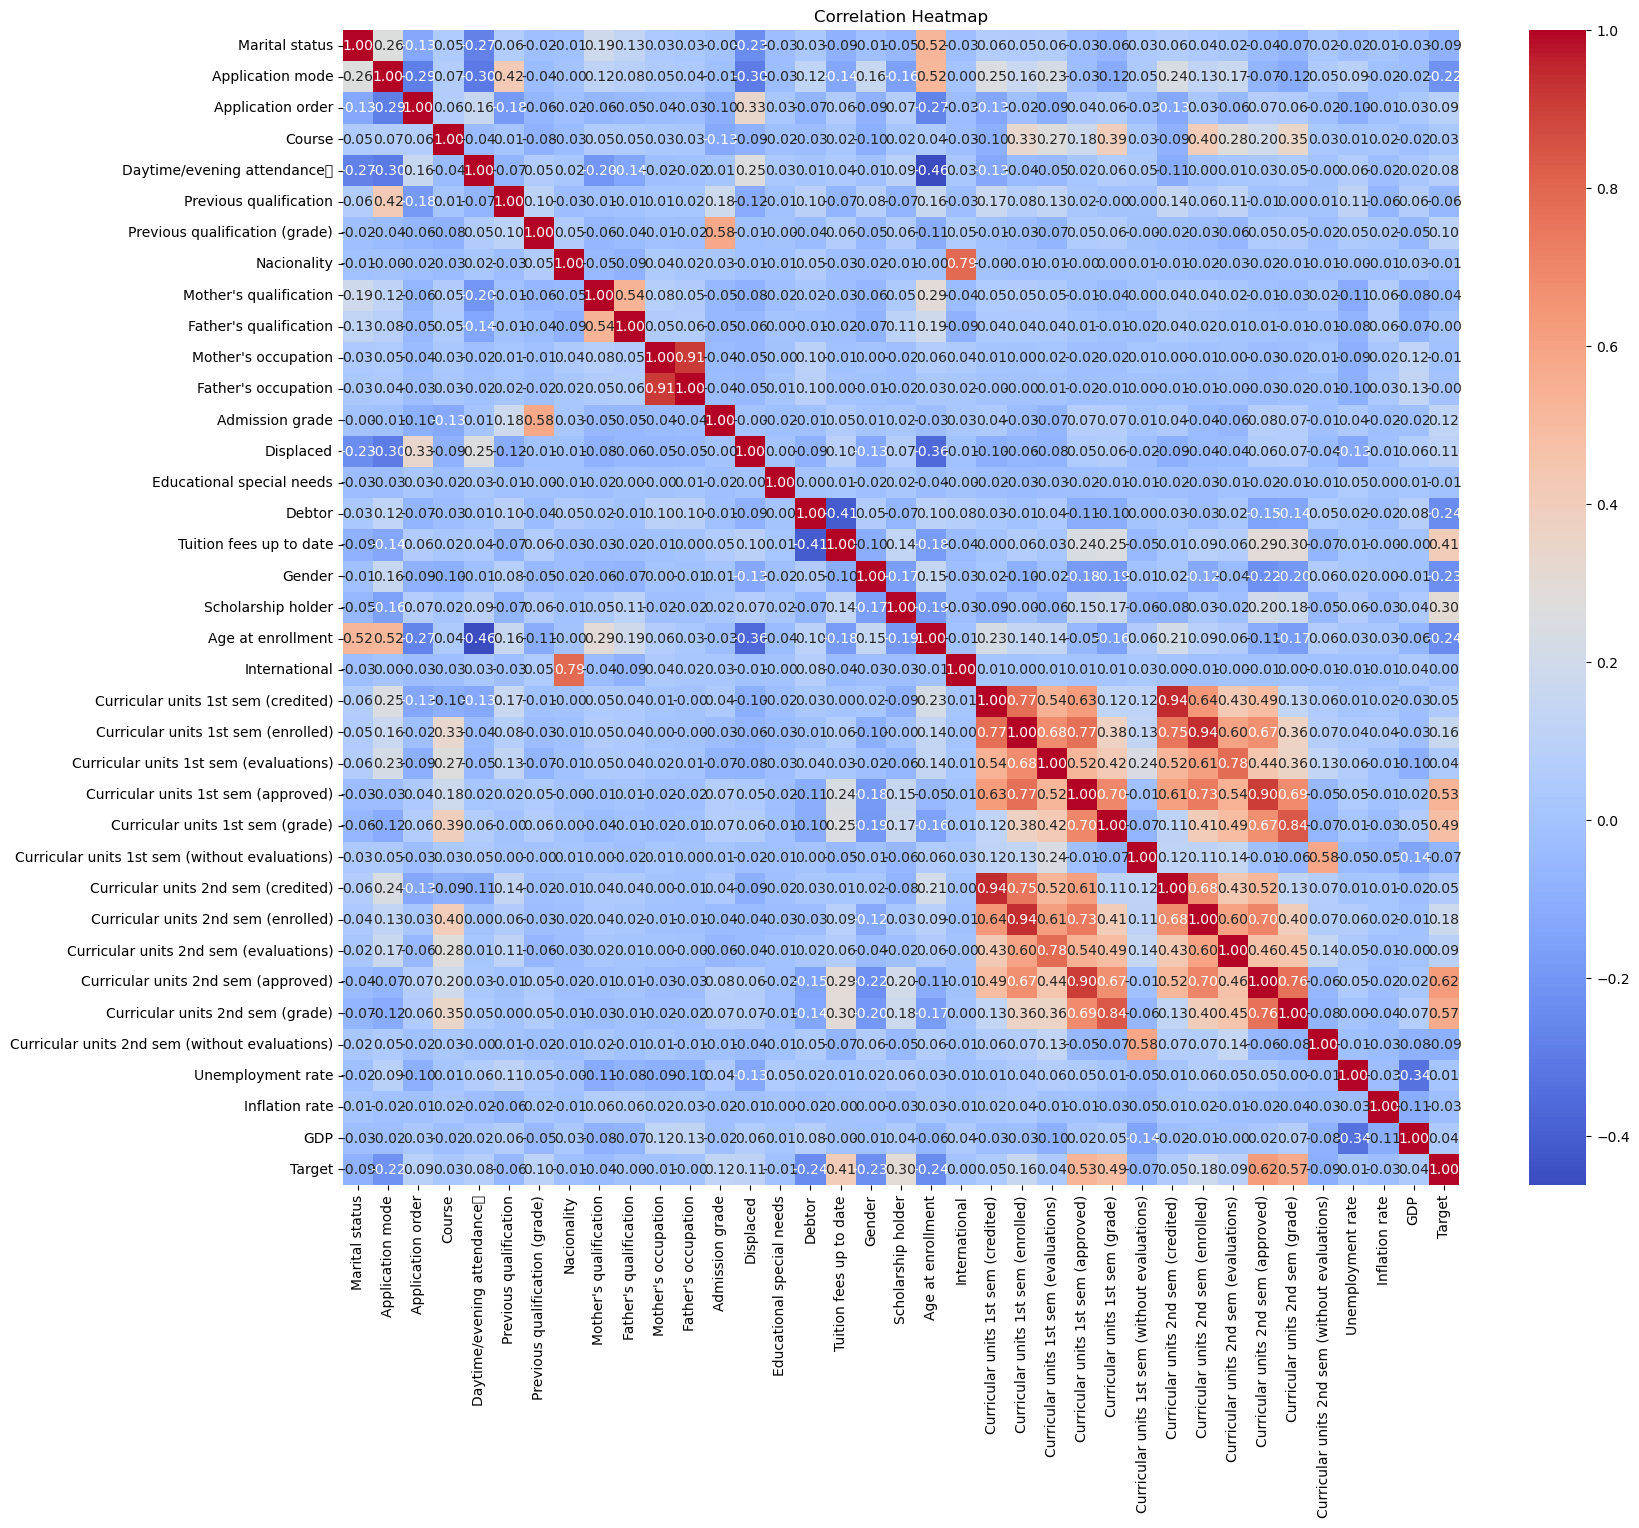

In [14]:
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
X=df_numeric[['Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']]
y=df_numeric['Target']

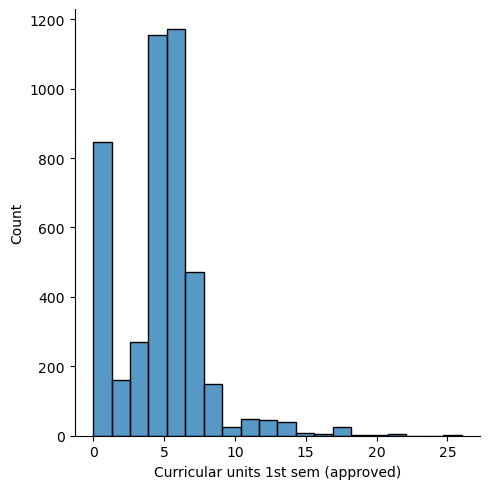

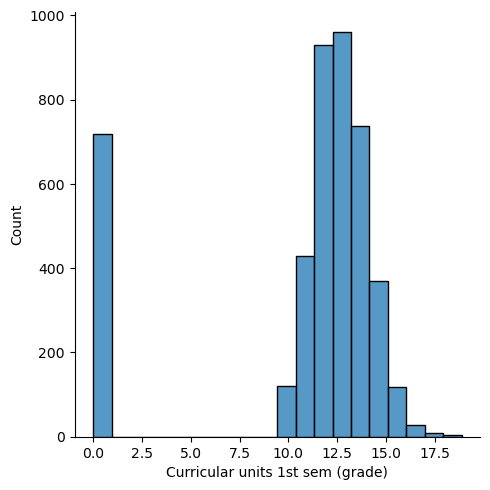

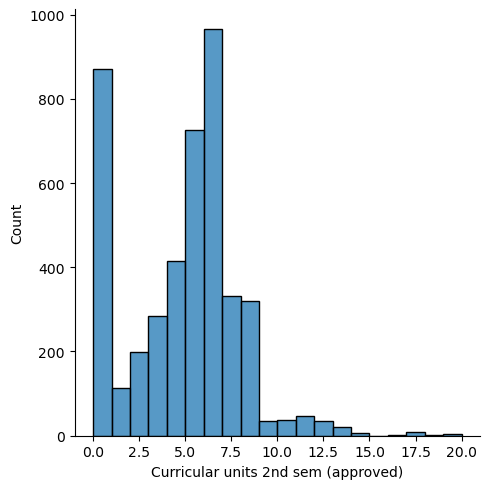

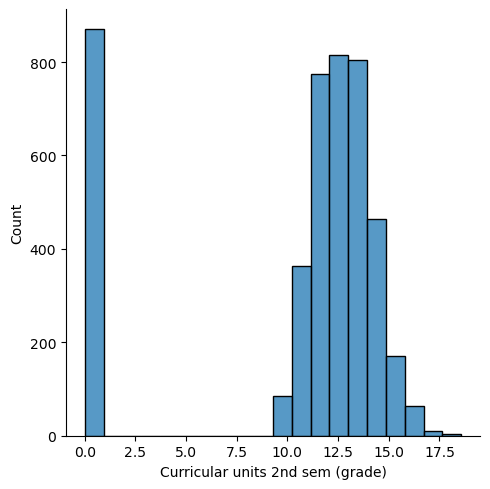

In [16]:
for i in X:
    sns.displot(df,x=i,bins=20)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [18]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [19]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

**Logistic Regression**

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
param_dist = {'C': [0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
random_search = RandomizedSearchCV(estimator=lm, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)
best_params = random_search.best_params_

lm=LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=0,C=best_params['C'])
solver=best_params['solver']
lm.fit(x_train,y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=0)

In [22]:
predict=lm.predict(x_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_5952\3518122437.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


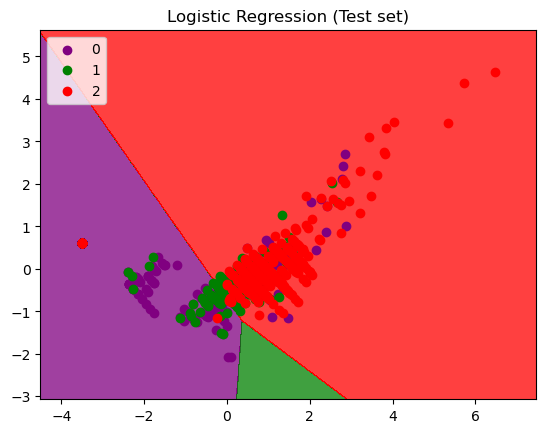

In [23]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)
meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('Logistic Regression (Test set)')    
plt.legend()  
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7288135593220338


In [26]:
from sklearn import metrics

In [27]:
Precision = metrics.precision_score(y_test, predict,average='weighted')

print(f'Precision: {Precision}')

Precision: 0.6070780746303744


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(f'Sensitivity_recall:{Sensitivity_recall}')

Sensitivity_recall:0.7288135593220338


In [29]:
Specificity = metrics.recall_score(y_test,predict,average='weighted')
print(f'Specificity:{Specificity}')

Specificity:0.7288135593220338


In [30]:
F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(f'F1_score:{F1_score}')

F1_score:0.65837076614574


In [31]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.69067797 0.71751412 0.69774011 0.71186441 0.69589816]
Average CV Score:  0.7027389542828375
Number of CV Scores used in Average:  5


In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.69915254 0.71327684 0.69774011 0.71468927 0.69165488]
Average CV Score:  0.7033027273671678
Number of CV Scores used in Average:  5


In [33]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(lm, x_train, y_train, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.7030234529528115
Number of CV Scores used in Average:  3539


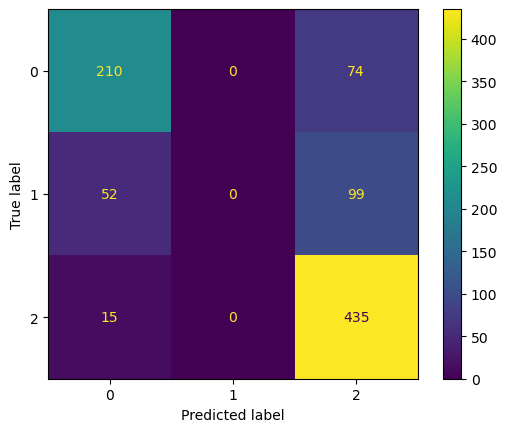

In [34]:
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

In [35]:
y_prob = lm.predict_proba(x_test)
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

ROC AUC Score: 0.8076662527829152


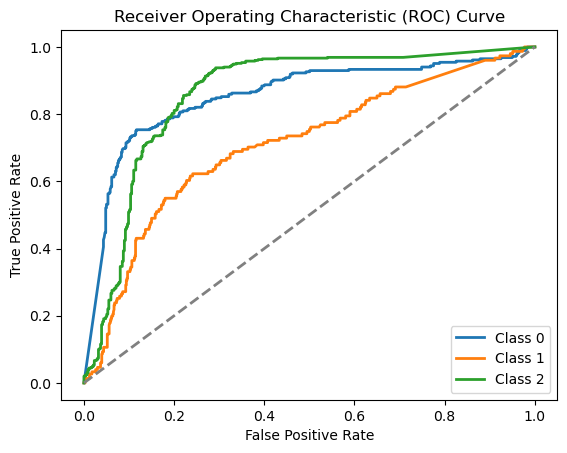

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {auc_score}")
fpr = {}
tpr = {}
thresholds = {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_prob[:, i])
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier  
lm= RandomForestClassifier(n_estimators= 8, criterion="entropy") 

lm.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=8)

In [39]:
predict=lm.predict(x_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_5952\4096594923.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


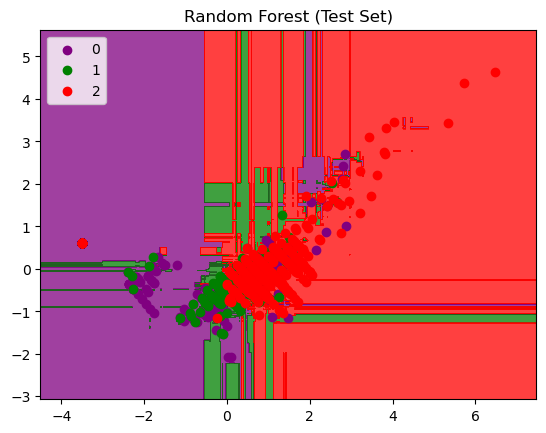

In [40]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)
meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('Random Forest (Test Set)')    
plt.legend()  
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6779661016949152


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6779661016949152


In [43]:
Precision = metrics.precision_score(y_test, predict,average='weighted')

print(f'Precision: {Precision}')

Precision: 0.6607614727432052


In [44]:
Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(f'Sensitivity_recall:{Sensitivity_recall}')

Sensitivity_recall:0.6779661016949152


In [45]:
Specificity = metrics.recall_score(y_test,predict,average='weighted')
print(f'Specificity:{Specificity}')

Specificity:0.6779661016949152


In [46]:
F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(f'F1_score:{F1_score}')

F1_score:0.6671266432955634


In [47]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.66101695 0.65677966 0.62853107 0.6299435  0.65346535]
Average CV Score:  0.6459473065950664
Number of CV Scores used in Average:  5


In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.66525424 0.6440678  0.62288136 0.64971751 0.63083451]
Average CV Score:  0.6425510831954865
Number of CV Scores used in Average:  5


In [49]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(lm, x_train, y_train, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 1. 0.]
Average CV Score:  0.6366205142695677
Number of CV Scores used in Average:  3539


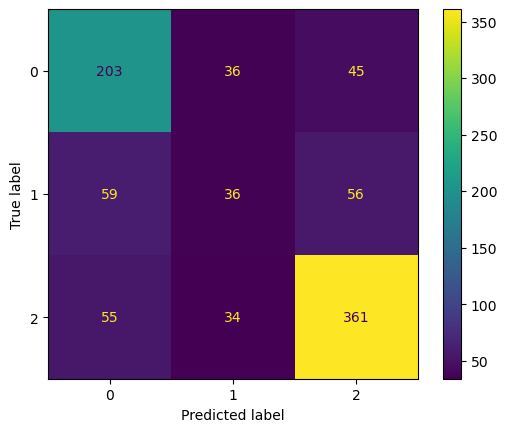

In [50]:
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

ROC AUC Score: 0.8076662527829152


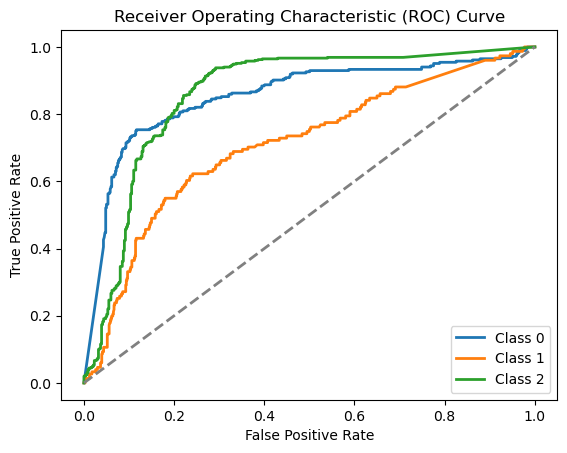

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {auc_score}")
fpr = {}
tpr = {}
thresholds = {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_prob[:, i])
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [53]:
lm=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1 )

lm.fit(x_train,y_train)

KNeighborsClassifier(p=1)

In [54]:
predict=lm.predict(x_test)

C:\Users\hp\AppData\Local\Temp\ipykernel_5952\504949224.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


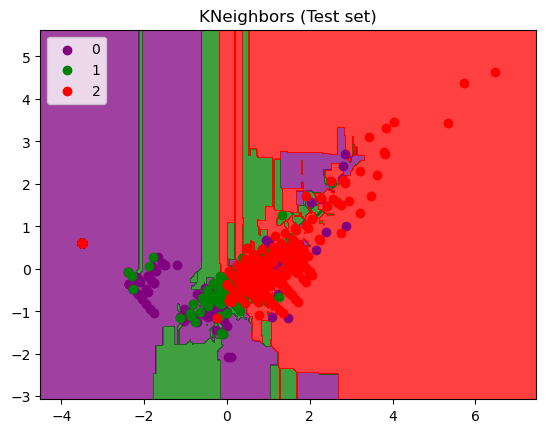

In [55]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_test, y_test  
pca = PCA(n_components=2)
x_set = pca.fit_transform(x_test)
x1, x2= np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
x1=x1.astype(float)
x2=x2.astype(float)
meshgrid_data = np.array([x1.ravel(), x2.ravel()]).T
original_space_data = pca.inverse_transform(meshgrid_data)
plt.contourf(x1, x2, lm.predict(original_space_data).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green','red'))(i), label = j)  
plt.title('KNeighbors (Test set)')    
plt.legend()  
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6971751412429379


In [57]:
Precision = metrics.precision_score(y_test, predict,average='weighted')

print(f'Precision: {Precision}')

Precision: 0.6757727951551711


In [58]:
from sklearn import metrics

In [59]:
Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
print(f'Sensitivity_recall:{Sensitivity_recall}')

Sensitivity_recall:0.6971751412429379


In [60]:
Specificity = metrics.recall_score(y_test,predict,average='weighted')
print(f'Specificity:{Specificity}')

Specificity:0.6971751412429379


In [61]:
F1_score = metrics.f1_score(y_test,predict,average='weighted')
print(f'F1_score:{F1_score}')

F1_score:0.6839215623051573


In [62]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.65677966 0.66384181 0.65677966 0.64689266 0.66902405]
Average CV Score:  0.6586635661144806
Number of CV Scores used in Average:  5


In [63]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lm, x_train, y_train, cv = sk_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.65960452 0.66525424 0.65819209 0.6539548  0.66336634]
Average CV Score:  0.6600743972702355
Number of CV Scores used in Average:  5


In [64]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(lm, x_train, y_train, cv = loo)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 0. 1. ... 1. 0. 0.]
Average CV Score:  0.652161627578412
Number of CV Scores used in Average:  3539


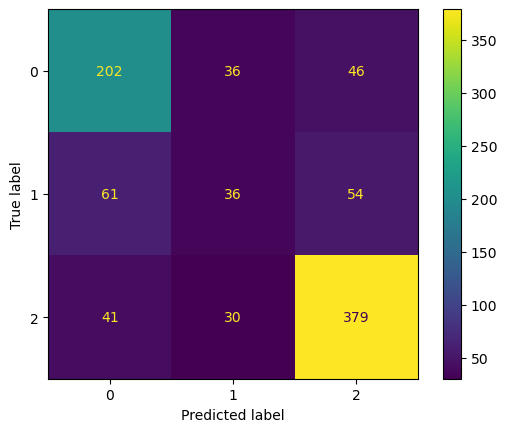

In [65]:
y_test = np.array(y_test) 
predict = np.array(predict)
confusion_matrix = metrics.confusion_matrix(y_test, predict)
classes = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                            display_labels=classes)
cm_display.plot()
plt.show()

ROC AUC Score: 0.8076662527829152


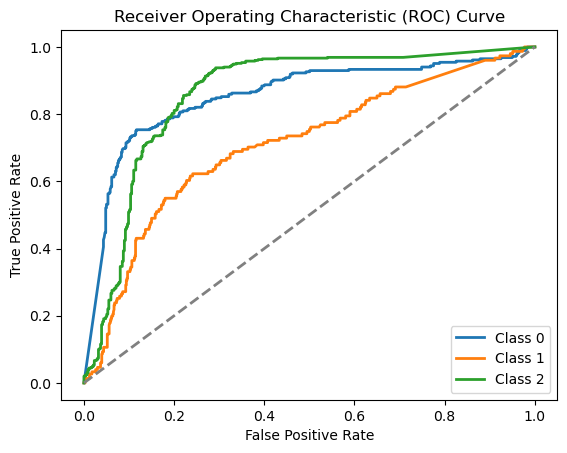

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"ROC AUC Score: {auc_score}")
fpr = {}
tpr = {}
thresholds = {}
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_prob[:, i])
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()